In [ ]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 713.0 kB/s eta 0:00:00


In [ ]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import random

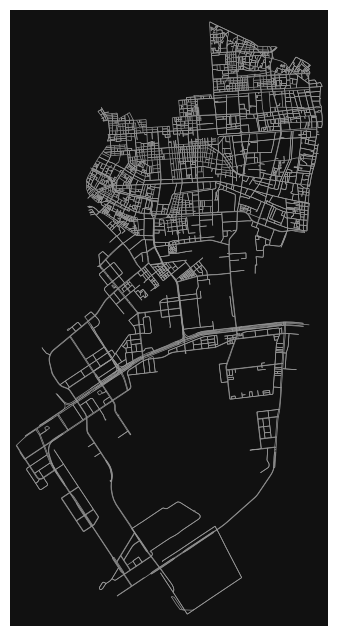

In [ ]:
%matplotlib inline

# The query string format is "city, state, country"
G = ox.graph_from_place('koto-ku, Tokyo, Japan', network_type='drive')
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5, show=False, close=False)

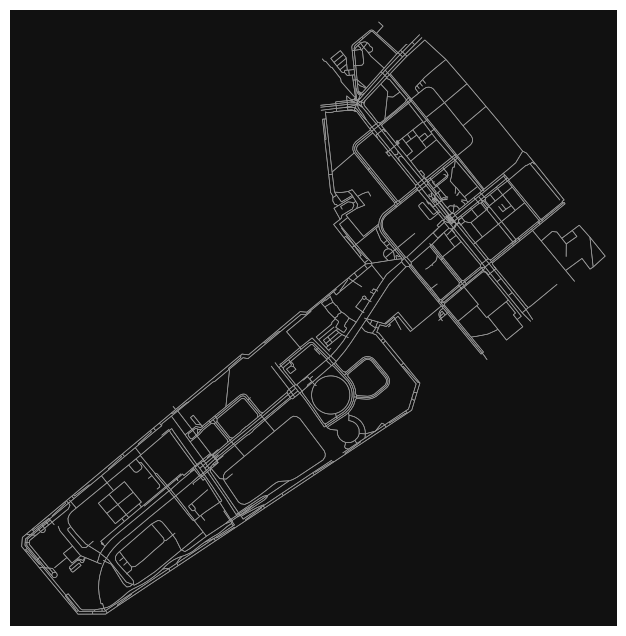

In [ ]:
%matplotlib inline

# The query string format is "city, state, country"
G = ox.graph_from_place('toyosu-koto-ku, Tokyo, Japan', network_type='walk')
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5, show=False, close=False)

In [ ]:
nodes=list(G.nodes())

In [ ]:
peo=random.sample(nodes, 3)
trajectories = []
for i in peo :
    trajectory = []
    trajectory.append(i)
    pre_p=i
    for l in range(60):
        now_p=random.choice(list(G.neighbors(pre_p)))
        trajectory.append(now_p)
        pre_p=now_p
    trajectories.append(trajectory)



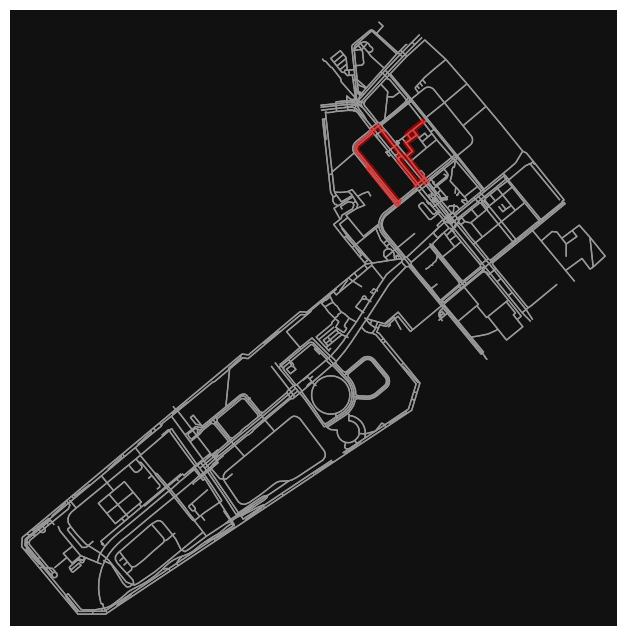

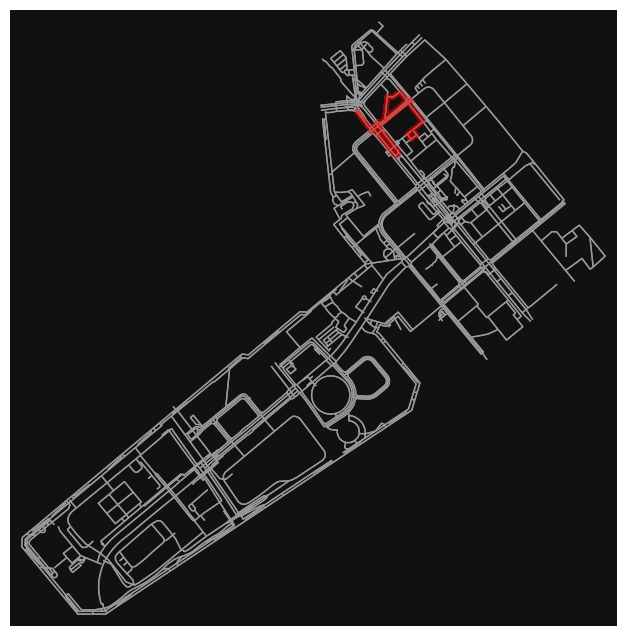

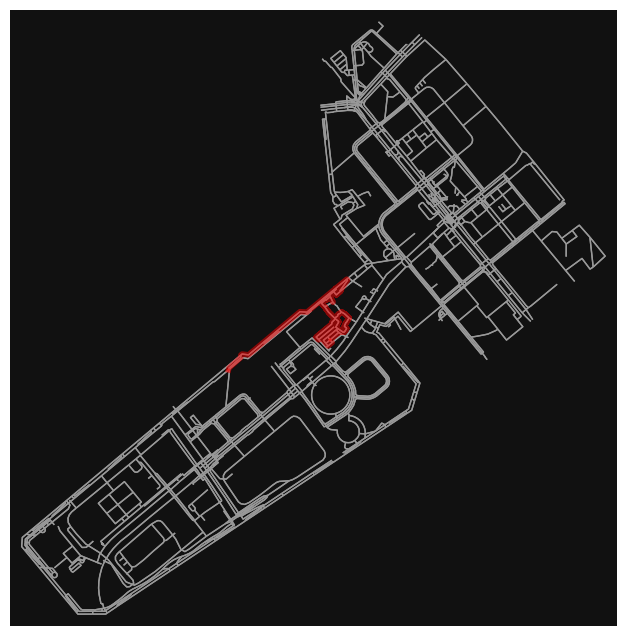

In [ ]:
fig, ax = ox.plot_graph_route(G,trajectories[0] , orig_dest_size=5, node_size=0)
fig, ax = ox.plot_graph_route(G,trajectories[1] , orig_dest_size=5, node_size=0)
fig, ax = ox.plot_graph_route(G,trajectories[2] , orig_dest_size=5, node_size=0)

In [ ]:
G.number_of_edges()

2972

In [ ]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

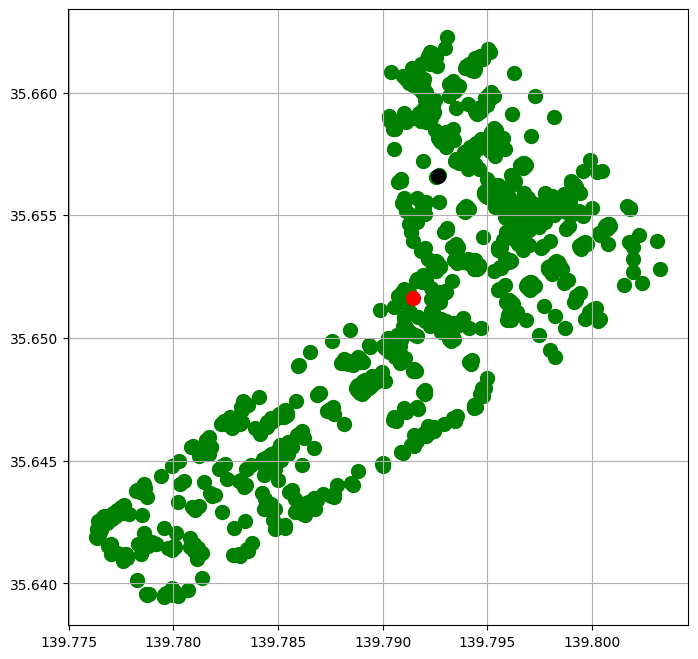

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.grid()
#plt.xlim(-D, D)
#plt.ylim(-D, D)
#plt.plot(gdf_nodes.x, gdf_nodes.y)
plt.scatter(gdf_nodes.x,gdf_nodes.y, color="green", s=100)
plt.scatter(gdf_nodes.x.mean(),gdf_nodes.y.mean(), color="red", s=100)
plt.scatter(G.nodes[trajectories[0][-1]]['x'],G.nodes[trajectories[0][-1]]['y'], color="black", s=100)

In [ ]:
peo=random.sample(nodes, 10)
trajectories2 = []
for i in peo :
    trajectory2 = []
    trajectory.append(i)
    pre_p=i
    for l in range(60):
        now_p=random.choice(list(G.neighbors(pre_p)))
        trajectory.append(now_p)
        pre_p=now_p
    trajectories.append(trajectory)

In [ ]:
peo=random.sample(nodes, 10)
trajectories2 = []
for i in peo :
    trajectory2 = []
    pre_p=i
    for l in range(10):
       for t in range(60):
          now_p=random.choice(list(G.neighbors(pre_p)))
          pre_p=now_p
       trajectory2.append(now_p)
    trajectories2.append(trajectory2)

In [ ]:
co=[]
for i in trajectories2:
   c1=[]
   for l in i:

     c1.append((G.nodes[l]['x'],G.nodes[l]['y']))
   co.append(c1)

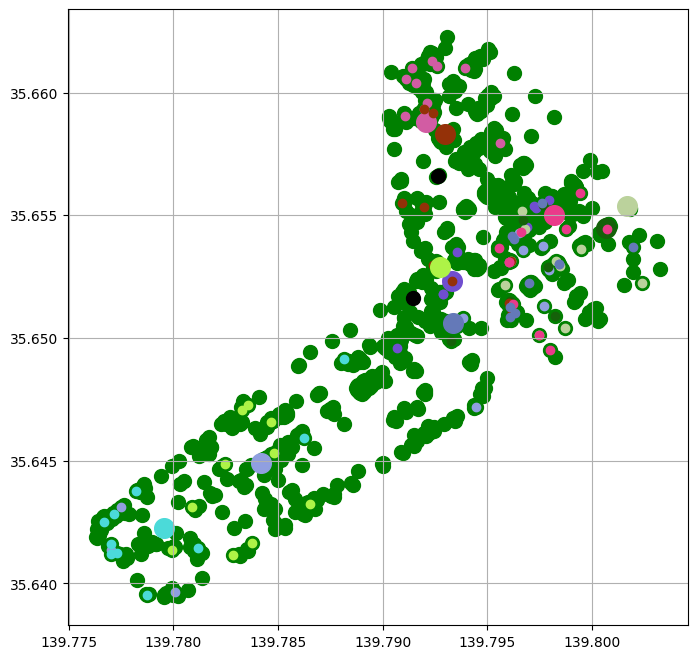

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.grid()
#plt.xlim(-D, D)
#plt.ylim(-D, D)
#plt.plot(gdf_nodes.x, gdf_nodes.y)
plt.scatter(gdf_nodes.x,gdf_nodes.y, color="green", s=100)
plt.scatter(gdf_nodes.x.mean(),gdf_nodes.y.mean(), color="black", s=100)
plt.scatter(G.nodes[trajectories[0][-1]]['x'],G.nodes[trajectories[0][-1]]['y'], color="black", s=100)

for i in range(len(co)) :
   col=np.random.rand(3)
   plt.scatter(np.array(co[i])[0:,0],np.array(co[i])[0:,1],color=col)
   plt.scatter(G.nodes[peo[i]]['x'],G.nodes[peo[i]]['y'],color=col,s=200)

In [ ]:
trajectories3 = []
for i in nodes :
    trajectory3 = []
    pre_p=i
    for l in range(10):
       #pre_p=i
       for t in range(60):
          now_p=random.choice(list(G.neighbors(pre_p)))
          pre_p=now_p
       trajectory3.append(now_p)
    trajectories3.append(trajectory3)

In [ ]:
tra=[]
for i in nodes:
   pre_tra=[[i]*10]
   for t in range(60):
     now_p=[ random.choice(list(G.neighbors(i)))  for  i in pre_tra[-1]]
     pre_tra.append(now_p)
     #pre_tra=now_p
   tra.append( pre_tra)

In [ ]:
nod=[[i]*10 for i in nodes]
tra1=[nod]
for t in range(60):
  now_p=[[ random.choice(list(G.neighbors(l)))  for l in tra1[-1][i]] for i in range(len(nod))]
  tra1.append(now_p)

In [ ]:
nod=[[i]*10 for i in nodes]
tra2=[nod]

now_p=[[ random.choice(list(G.neighbors(l)))  for l in tra1[-1][i]] for i in range(len(nod))]
tra1.append(now_p)

In [ ]:
cn=random.choice(nodes)
nod=[[i]*10 for i in nodes]
nod[nodes.index(cn)][0:5]=[0]*5
nod1=[[0]*10 for i in nodes]
nod1[nodes.index(cn)][0:5]=[cn]*5

In [ ]:
cn=random.choice(nodes)
nod=[[i]*10 for i in nodes]
nod[nodes.index(cn)][0:5]=[0]*5
nod1=[[0]*10 for i in nodes]
nod1[nodes.index(cn)][0:5]=[cn]*5
tra2=[nod]
tra3=[nod1]
for i in range(60):
   now_p=[[ random.choice(list(G.neighbors(l))) if l !=0 else 0  for l in tra2[-1][i]] for i in range(len(nod))]
   tra2.append(now_p)
   now_p1=[[ random.choice(list(G.neighbors(l))) if l !=0 else 0  for l in tra3[-1][i]] for i in range(len(nod1))]
   tra3.append(now_p1)
   count1=np.zeros((990,990))
   count2=np.zeros((990,990))
   for i in range(990):
       for l in range(10):
        v=tra2[-1][i][l]
        c=tra3[-1][i][l]
        if v != 0 :
             count1[nodes.index(v)][i]+=1
        elif c!=0:
            count2[nodes.index(c)][i]+=1
   s=np.add(np.sum(count2,axis=1), np.sum(count1,axis=1))
   pd=np.multiply(np.sum(count2,axis=1), np.sum(count1,axis=1))
   d=np.divide(pd,s)
   d=np.nan_to_num(d,nan = 0)
   ds=np.round(np.abs(np.random.normal(loc   = 0, scale=1,size  = 990,)*d))
   nl=np.where(ds>0)[0]
   tra2=np.array(tra2)
   tra3=np.array(tra3)
   for i in range(len(nl)):
     c1=np.sum(count1[nl[i]])
     c2=ds[nl[i]]
     if  c1 > c2 or c1 == c2:
        on=np.where(tra2[-1]== nodes[nl[i]])
        nn=len(on[0])
        re=[np.random.choice(range(nn),int(ds[nl[i]]))]
        xl=on[0][re]
        yl=on[1][re]
        tra2[-1][xl,yl] =0
        tra3[-1][xl,yl]= nodes[nl[i]]

     elif  c1 < c2 and  c1 >=1 :
        on=np.where(tra2[-1]== nodes[nl[i]])
        nn=len(on[0])
        re=[np.random.choice(range(nn),int(c1))]
        xl=on[0][re]
        yl=on[1][re]
        tra2[-1][xl,yl] =0
        tra3[-1][xl,yl]= nodes[nl[i]]

   tra2=tra2.tolist()
   tra3=tra3.tolist()




<ipython-input-202-5b43c7a6268e>:26: RuntimeWarning: invalid value encountered in divide
  d=np.divide(pd,s)


In [ ]:
np.array(tra2).shape,np.array(tra3).shape

((61, 990, 10), (61, 990, 10))

In [ ]:
count1=np.zeros((990,990))
count2=np.zeros((990,990))
for i in range(990):
       for l in range(10):
        v=tra2[-1][i][l]
        c=tra3[-1][i][l]
        if v != 0 :
             count1[nodes.index(v)][i]+=1
        elif c!=0:
            count2[nodes.index(c)][i]+=1

In [ ]:
np.sum(count1)+np.sum(count2)

9900.0

In [ ]:
co=[]
for i in trajectories2:
   c1=[]
   for l in i:

     c1.append((G.nodes[l]['x'],G.nodes[l]['y']))
   co.append(c1)

In [ ]:
co=[]
for i in tra2[-1]:
   c1=[]
   for l in i:

    if l == 0 :pass
    else :
      c1.append((G.nodes[l]['x'],G.nodes[l]['y']))

   co.append(c1)

In [ ]:
co=[]
for i in tra2[30]:
   c1=[]
   for l in i:

    if l == 0 :pass
    else :
      c1.append((G.nodes[l]['x'],G.nodes[l]['y']))

   co.append(c1)
co1=[]
for i in tra3[30]:
   c2=[]
   for l in i:

    if l == 0 :pass
    else :
      c2.append((G.nodes[l]['x'],G.nodes[l]['y']))

   co1.append(c2)

In [ ]:
co1=[]
for i in tra3[-1]:
   c2=[]
   for l in i:

    if l == 0 :pass
    else :
      c2.append((G.nodes[l]['x'],G.nodes[l]['y']))

   co1.append(c2)

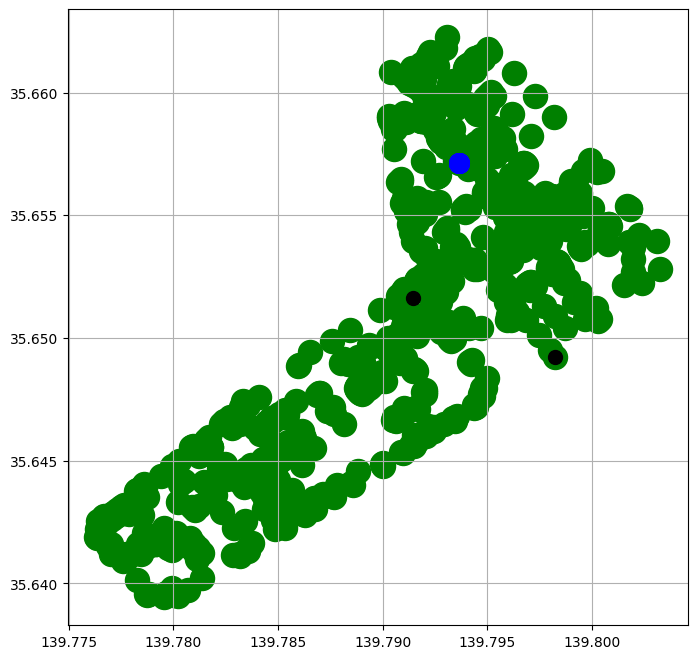

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.grid()
#plt.xlim(-D, D)
#plt.ylim(-D, D)
#plt.plot(gdf_nodes.x, gdf_nodes.y)
plt.scatter(gdf_nodes.x,gdf_nodes.y, color="green", s=300)
plt.scatter(gdf_nodes.x.mean(),gdf_nodes.y.mean(), color="black", s=100)
plt.scatter(G.nodes[trajectories[0][-1]]['x'],G.nodes[trajectories[0][-1]]['y'], color="black", s=100)

for i in tra3[0][nodes.index(cn)]:
   if i  ==0: pass
   else :
    plt.scatter(G.nodes[i]['x'],G.nodes[i]['y'],color="blue",s=200)

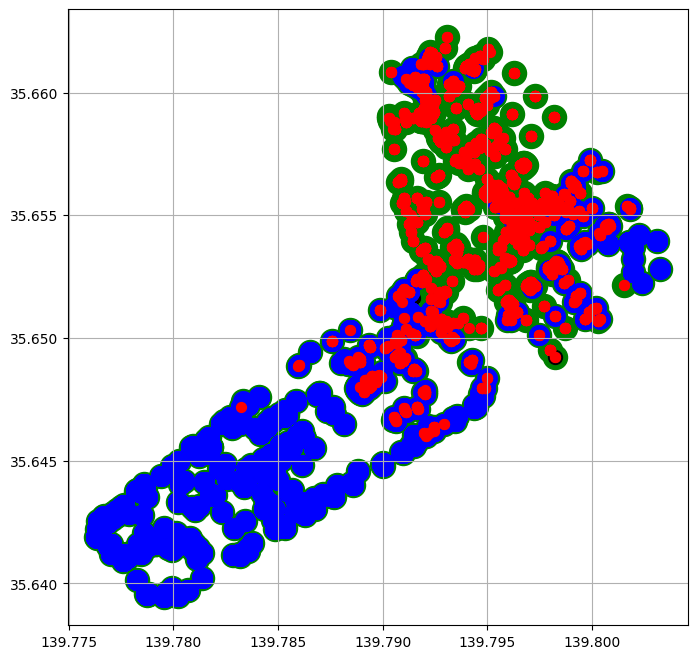

In [ ]:
co=[]
for i in tra2[30]:
   c1=[]
   for l in i:
    if l == 0 :pass
    else :
      c1.append((G.nodes[l]['x'],G.nodes[l]['y']))

   co.append(c1)
co1=[]
for i in tra3[30]:
   c2=[]
   for l in i:
    if l == 0 :pass
    else :
      c2.append((G.nodes[l]['x'],G.nodes[l]['y']))

   co1.append(c2)



fig = plt.figure(figsize=(8, 8))
plt.grid()
#plt.xlim(-D, D)
#plt.ylim(-D, D)
#plt.plot(gdf_nodes.x, gdf_nodes.y)
plt.scatter(gdf_nodes.x,gdf_nodes.y, color="green", s=300)
plt.scatter(gdf_nodes.x.mean(),gdf_nodes.y.mean(), color="black", s=100)
plt.scatter(G.nodes[trajectories[0][-1]]['x'],G.nodes[trajectories[0][-1]]['y'], color="black", s=100)

for i in range(len(co)) :
   #col=np.random.rand(3)
   if len(co[i]) ==0: pass
   else :
    plt.scatter(np.array(co[i])[0:,0],np.array(co[i])[0:,1],color="blue",s=200)
    #plt.scatter(G.nodes[peo[i]]['x'],G.nodes[peo[i]]['y'],color=col,s=200)
for i in range(len(co1)) :
    if len(co1[i]) ==0: pass
    else :
      plt.scatter(np.array(co1[i])[0:,0],np.array(co1[i])[0:,1],color="red",s=50)

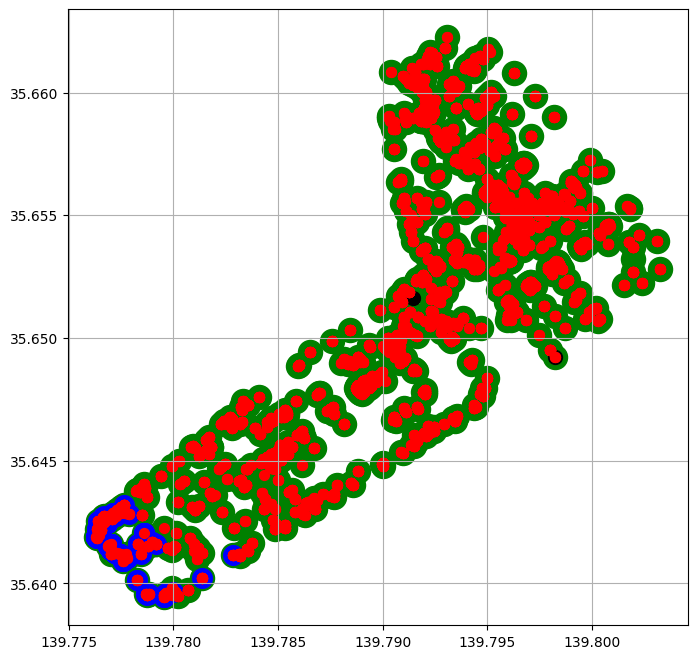

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.grid()
#plt.xlim(-D, D)
#plt.ylim(-D, D)
#plt.plot(gdf_nodes.x, gdf_nodes.y)
plt.scatter(gdf_nodes.x,gdf_nodes.y, color="green", s=300)
plt.scatter(gdf_nodes.x.mean(),gdf_nodes.y.mean(), color="black", s=100)
plt.scatter(G.nodes[trajectories[0][-1]]['x'],G.nodes[trajectories[0][-1]]['y'], color="black", s=100)

for i in range(len(co)) :
   col=np.random.rand(3)
   if len(co[i]) ==0: pass
   else :
    plt.scatter(np.array(co[i])[0:,0],np.array(co[i])[0:,1],color="blue",s=200)
    #plt.scatter(G.nodes[peo[i]]['x'],G.nodes[peo[i]]['y'],color=col,s=200)
for i in range(len(co1)) :
    plt.scatter(np.array(co1[i])[0:,0],np.array(co1[i])[0:,1],color="red",s=50)

In [ ]:
lt=[]
for  i in range(10):
   lt_1=[]
   for l in np.array(tra2)[:,50,:][:,i]:
      if l ==0 :pass
      else:
         lt_1.append((G.nodes[l]['x'],G.nodes[l]['y']))

   lt.append(lt_1)

lt1=[]
for  i in range(10):
   lt_1=[]
   for l in np.array(tra3)[:,50,:][:,i]:
      if l ==0 :pass
      else:
         lt_1.append((G.nodes[l]['x'],G.nodes[l]['y']))

   lt1.append(lt_1)

In [ ]:
len(lt),len(lt1)

(10, 10)

In [ ]:
lt[0][0]

(139.7966699, 35.654575)

In [ ]:
np.array(lt[0])[:,0]

array([139.7966699, 139.7964984, 139.7966699, 139.7968283, 139.7967195,
       139.7966613, 139.7965734, 139.7966613, 139.7965734, 139.7966613,
       139.7965734, 139.7966613, 139.7965734, 139.7964557])

In [ ]:
np.array(lt)[0]

<ipython-input-311-f6d49aca501c>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(lt)[0]


[(139.7966699, 35.654575),
 (139.7964984, 35.6544528),
 (139.7966699, 35.654575),
 (139.7968283, 35.6546788),
 (139.7967195, 35.6547944),
 (139.7966613, 35.6548563),
 (139.7965734, 35.6548769),
 (139.7966613, 35.6548563),
 (139.7965734, 35.6548769),
 (139.7966613, 35.6548563),
 (139.7965734, 35.6548769),
 (139.7966613, 35.6548563),
 (139.7965734, 35.6548769),
 (139.7964557, 35.6548022)]

In [ ]:
lt1[0]

[(139.7965734, 35.6548769),
 (139.7966613, 35.6548563),
 (139.7967195, 35.6547944),
 (139.7966613, 35.6548563),
 (139.7965734, 35.6548769),
 (139.7966613, 35.6548563),
 (139.7969287, 35.6550338),
 (139.7966613, 35.6548563),
 (139.7965734, 35.6548769),
 (139.7964557, 35.6548022),
 (139.7965638, 35.654691),
 (139.7964557, 35.6548022),
 (139.7965638, 35.654691),
 (139.7967195, 35.6547944),
 (139.7965638, 35.654691),
 (139.7967195, 35.6547944),
 (139.7965638, 35.654691),
 (139.7966699, 35.654575),
 (139.7968033, 35.6544431),
 (139.7975785, 35.6536762),
 (139.7968033, 35.6544431),
 (139.7966699, 35.654575),
 (139.7968283, 35.6546788),
 (139.7968895, 35.6546138),
 (139.7970162, 35.6547067),
 (139.7968747, 35.6545258),
 (139.7967708, 35.6544563),
 (139.7965947, 35.6546351),
 (139.7965086, 35.6545792),
 (139.7965947, 35.6546351),
 (139.7967708, 35.6544563),
 (139.7965744, 35.6542445),
 (139.7966685, 35.6541177),
 (139.7965244, 35.6542578),
 (139.7966261, 35.6543254),
 (139.7968033, 35.6544431)

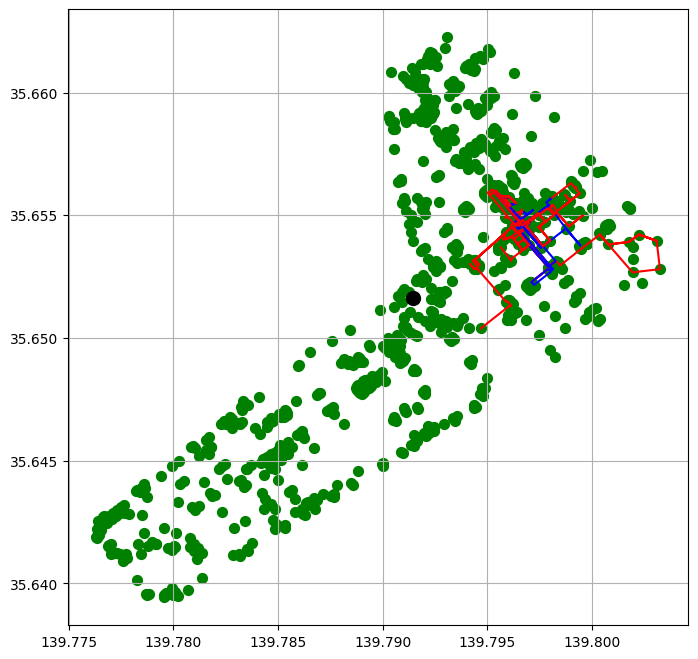

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.grid()
#plt.xlim(-D, D)
#plt.ylim(-D, D)
#plt.plot(gdf_nodes.x, gdf_nodes.y)
plt.scatter(gdf_nodes.x,gdf_nodes.y, color="green", s=50)
plt.scatter(gdf_nodes.x.mean(),gdf_nodes.y.mean(), color="black", s=100)
#plt.scatter(G.nodes[trajectories[0][-1]]['x'],G.nodes[trajectories[0][-1]]['y'], color="black", s=100)

for i in range(10):

    plt.plot(np.array(lt[i])[:,0],np.array(lt[i])[:,1],color="blue")
    plt.plot(np.array(lt1[i])[:,0],np.array(lt1[i])[:,1],color="red")

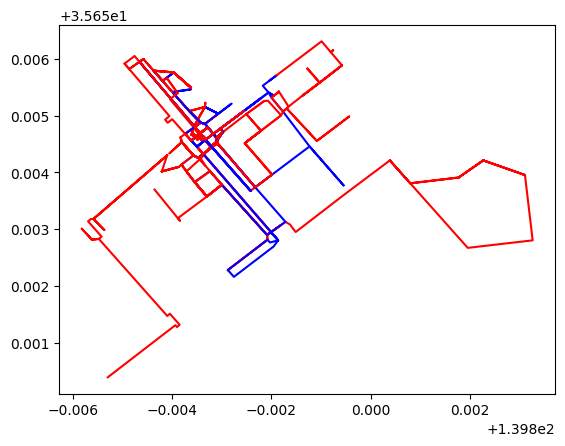

In [ ]:
for i in range(10):

    plt.plot(np.array(lt[i])[:,0],np.array(lt[i])[:,1],color="blue")
    plt.plot(np.array(lt1[i])[:,0],np.array(lt1[i])[:,1],color="red")

In [ ]:
x=20*np.ones(len(nodes))

In [ ]:
a=nx.adjacency_matrix(G)

In [ ]:
a1=a.toarray()

In [ ]:
x=20*np.ones(len(nodes))
a1=a.toarray()
t=np.abs(np.random.multivariate_normal(np.zeros(990), np.eye(990) ,990))
#t=np.random.uniform(0, 3, (990, 990))
b=t*a1
for i in range(len(b)):
     #print(np.sum(b[i]))
     b[i]=b[i]/np.sum(b[i])
for i in range(5):

   x=(x+(b.T-b)@x)

In [ ]:
x=20*np.ones(len(nodes))
a1=a.toarray()
t=np.random.uniform(0, 2, (990, 990))
b=t*a1
for i in range(len(b)):
     #print(np.sum(b[i]))
     b[i,:]=b[i,:]/np.sum(b[i,:])

In [ ]:
degrees = [val for (node, val) in G.degree()]

In [ ]:
list(G.neighbors(245578986))

[3428284129, 3428284109, 3176773582, 3428284132]

In [ ]:
2*np.linalg.inv(np.diag(degrees))@a1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.33333333,
        0.        ]])

In [ ]:
np.diag(degrees)

array([[8, 0, 0, ..., 0, 0, 0],
       [0, 8, 0, ..., 0, 0, 0],
       [0, 0, 8, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 6, 0, 0],
       [0, 0, 0, ..., 0, 6, 0],
       [0, 0, 0, ..., 0, 0, 6]])

In [ ]:
x=20*np.ones(len(nodes))
a1=a.toarray()
t=np.random.uniform(0, 2, (990, 990))
b=t*a1
for i in range(len(b)):
     #print(np.sum(b[i]))
     b[i,:]=b[i,:]/np.sum(b[i,:])
for i in range(5):

   x=b.T@x

In [ ]:
x=20*np.ones(len(nodes))
a1=a.toarray()

for i in range(10):
   t=np.random.uniform(0, 2, (990, 990))
   b=t*a1
   for i in range(len(b)):
     #print(np.sum(b[i]))
     b[i,:]=b[i,:]/np.sum(b[i,:])


   x=b.T@x

In [ ]:
x1=20*np.ones(len(nodes))
ini=random.choice(range(len(x1)))
x1[ini]=10
x2=np.zeros(len(nodes))
x2[ini]=10
a1=a.toarray()
t=np.random.uniform(0, 2, (990, 990))
b=t*a1
for i in range(len(b)):
     #print(np.sum(b[i]))
     b[i,:]=b[i,:]/np.sum(b[i,:])
for i in range(60):
   x1=b.T@x1
   x2=b.T@x2
   beta=np.round(np.random.uniform(0,1,990),1)
   delta=np.round(beta*((x1*x2)/(x1+x2)))
   delta=np.nan_to_num(delta,nan = 0)

   for i in range(len(delta)):
    c1=delta[i]
    c2=x1[i]
    if c1<c2 or c1 ==c2 :
      x1[i]=x1[i]-c1
      x2[i]=x2[i]+c1
    elif  c1>c2 and c1 >=1 and (c1-c2)<c2 :
     x1[i]=x1[i] -(c1-c2)
     x2[i]=x2[i] +(c1-c2)
    elif c1>c2 and c1 >=1 and (c1-c2)>c2 :
     x1[i]=x1[i]-1
     x2[i]=x2[i]+1

In [ ]:
np.sum(x1),np.sum(x2),np.sum(x1)+np.sum(x2)

(5622.4509213954025, 14177.549078604596, 19800.0)

In [ ]:
x1=20*np.ones(len(nodes))
ini=random.choice(range(len(x1)))
x1[ini]=10
x2=np.zeros(len(nodes))
x2[ini]=10
a1=a.toarray()
for i in range(60):
   t=np.random.uniform(0, 2, (990, 990))
   b=t*a1
   for i in range(len(b)):
     #print(np.sum(b[i]))
     b[i,:]=b[i,:]/np.sum(b[i,:])
   x1=b.T@x1
   x2=b.T@x2
   beta=np.round(np.random.uniform(0,1,990),1)
   delta=np.round(beta*((x1*x2)/(x1+x2)))
   delta=np.nan_to_num(delta,nan = 0)
   for i in range(len(delta)):
    c1=delta[i]
    c2=x1[i]
    if c1<c2 or c1 ==c2 :
      x1[i]=x1[i]-c1
      x2[i]=x2[i]+c1
    elif  c1>c2 and c1 >=1 and (c1-c2)<c2 :
     x1[i]=x1[i] -(c1-c2)
     x2[i]=x2[i] +(c1-c2)
    elif c1>c2 and c1 >=1 and (c1-c2)>c2 :
     x1[i]=x1[i]-1
     x2[i]=x2[i]+1

In [ ]:
np.sum(x1),np.sum(x2),np.sum(x1)+np.sum(x2)

(5968.023368466044, 13831.976631533955, 19800.0)

In [ ]:
nl=nx.incidence_matrix(G)

In [ ]:
nl1=nl.toarray()

In [ ]:
p=nx.incidence_matrix(G,nodelist=None).toarray()